<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("/content/program_5_dataset - program_5_dataset.csv")

In [33]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [34]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,613.000000,595.000000,612.000000,613.000000,615.000000,615.000000,604.000000,614.000000,615.000000,614.000000
mean,308.000000,47.408130,41.622838,68.263529,28.493627,34.731648,11.396748,8.196634,5.368013,81.271987,39.533171,72.044137
std,177.679487,10.055105,5.784979,26.049129,25.498962,33.090023,19.673150,2.205657,1.133665,49.795186,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.607500,67.000000,15.700000,69.300000
50%,308.000000,47.000000,42.000000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,76.850000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.100000,32.900000,11.200000,9.590000,6.065000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         613 non-null    float64
 5   ALP         595 non-null    float64
 6   ALT         612 non-null    float64
 7   AST         613 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        604 non-null    float64
 11  CREA        614 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [36]:
df.shape

(615, 14)

In [37]:
df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [38]:
df["PROT"].value_counts()

71.9    15
73.1    13
72.0     9
72.4     9
69.9     9
        ..
79.9     1
62.4     1
77.7     1
75.9     1
82.7     1
Name: PROT, Length: 198, dtype: int64

In [39]:
df.nunique()

Unnamed: 0    615
Category        5
Age            49
Sex             2
ALB           189
ALP           413
ALT           340
AST           296
BIL           188
CHE           407
CHOL          313
CREA          117
GGT           358
PROT          198
dtype: int64

In [40]:
df=df.drop(['Unnamed: 0'],axis=1)

In [41]:
df['CREA'].fillna(df['CREA'].mean(),inplace=True)

In [42]:
df['PROT'].fillna(df['PROT'].mean(),inplace=True)

In [43]:
df['ALB'].fillna(df['ALB'].mean(),inplace=True)

In [44]:
df['ALP'].fillna(df['ALP'].mean(),inplace=True)

In [45]:
df['AST'].fillna(df['AST'].mean(),inplace=True)

In [46]:
df['CHOL'].fillna(df['CHOL'].mean(),inplace=True)

In [47]:
df['ALT'].fillna(df['ALT'].mean(),inplace=True)

In [48]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

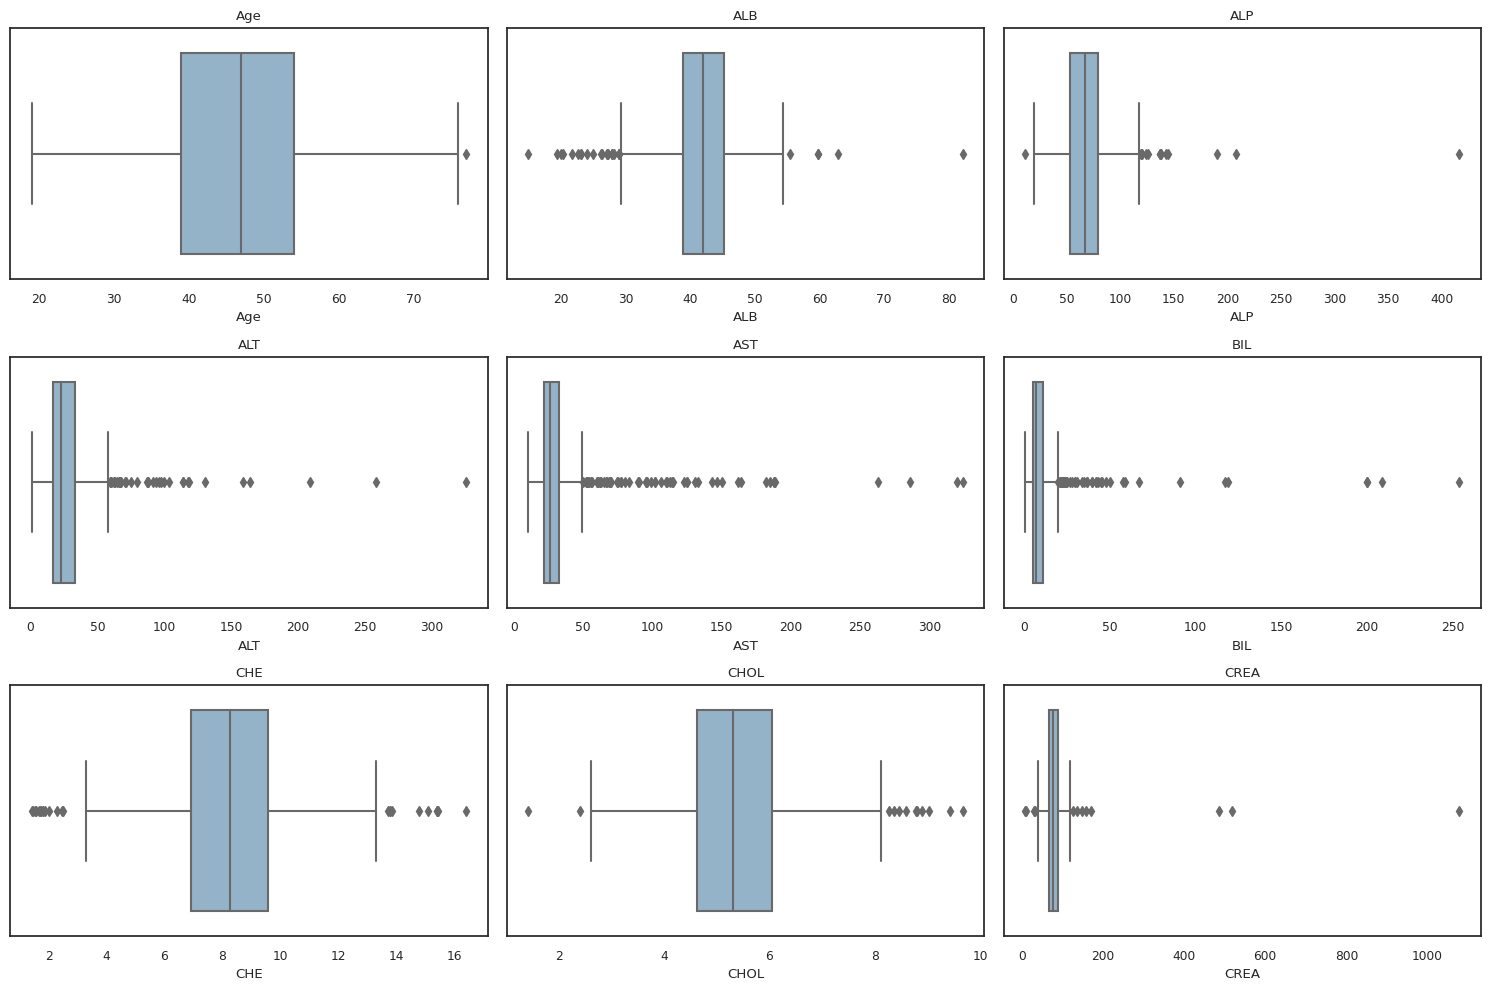

In [49]:
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars.columns[:len(axs)]):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

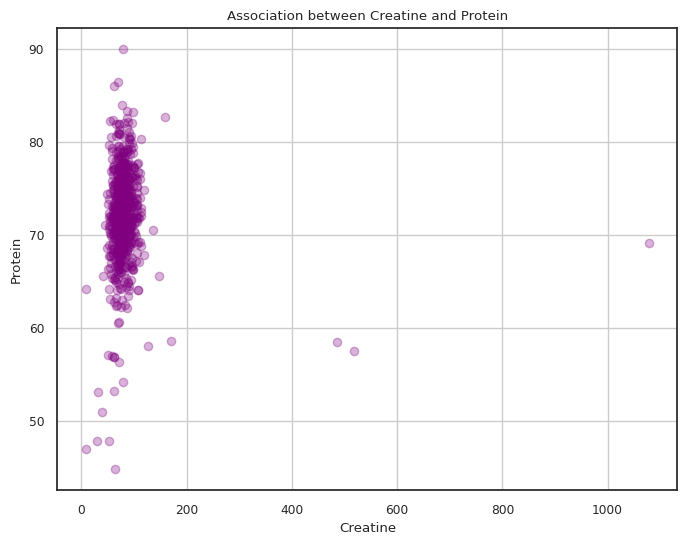

In [50]:
X = df['CREA']
y = df['PROT']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.3, color='purple')
plt.title('Association between Creatine and Protein')
plt.xlabel('Creatine')
plt.ylabel('Protein')
plt.grid(True)
plt.show()

<ipython-input-51-d07adb57caa6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt='.2g',annot=True,cmap='GnBu')


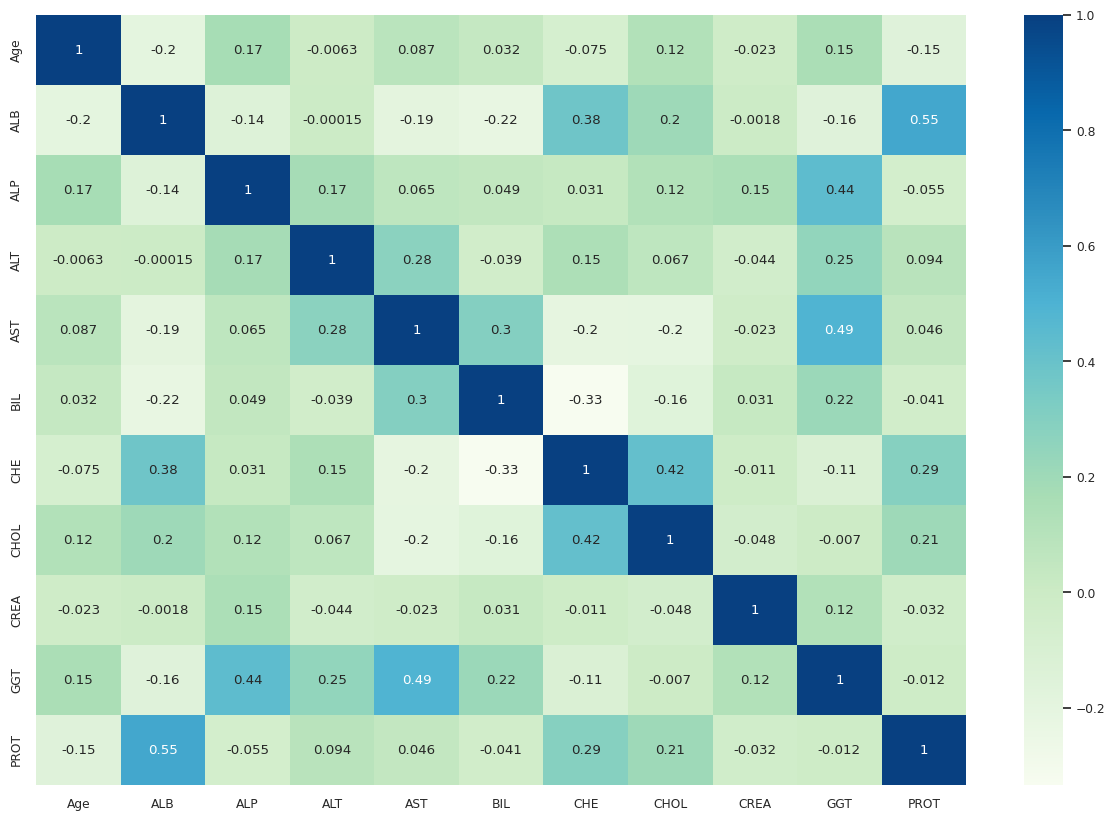

In [51]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True,cmap='GnBu')
plt.show()

<ipython-input-52-0c4b23417e06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


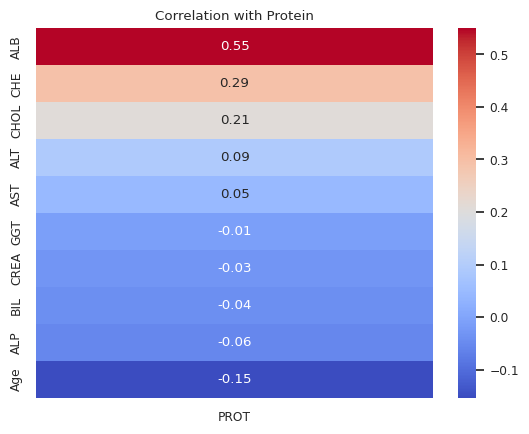

In [52]:
corr = df.corr()
target_corr = corr['PROT'].drop('PROT')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Protein')
plt.show()

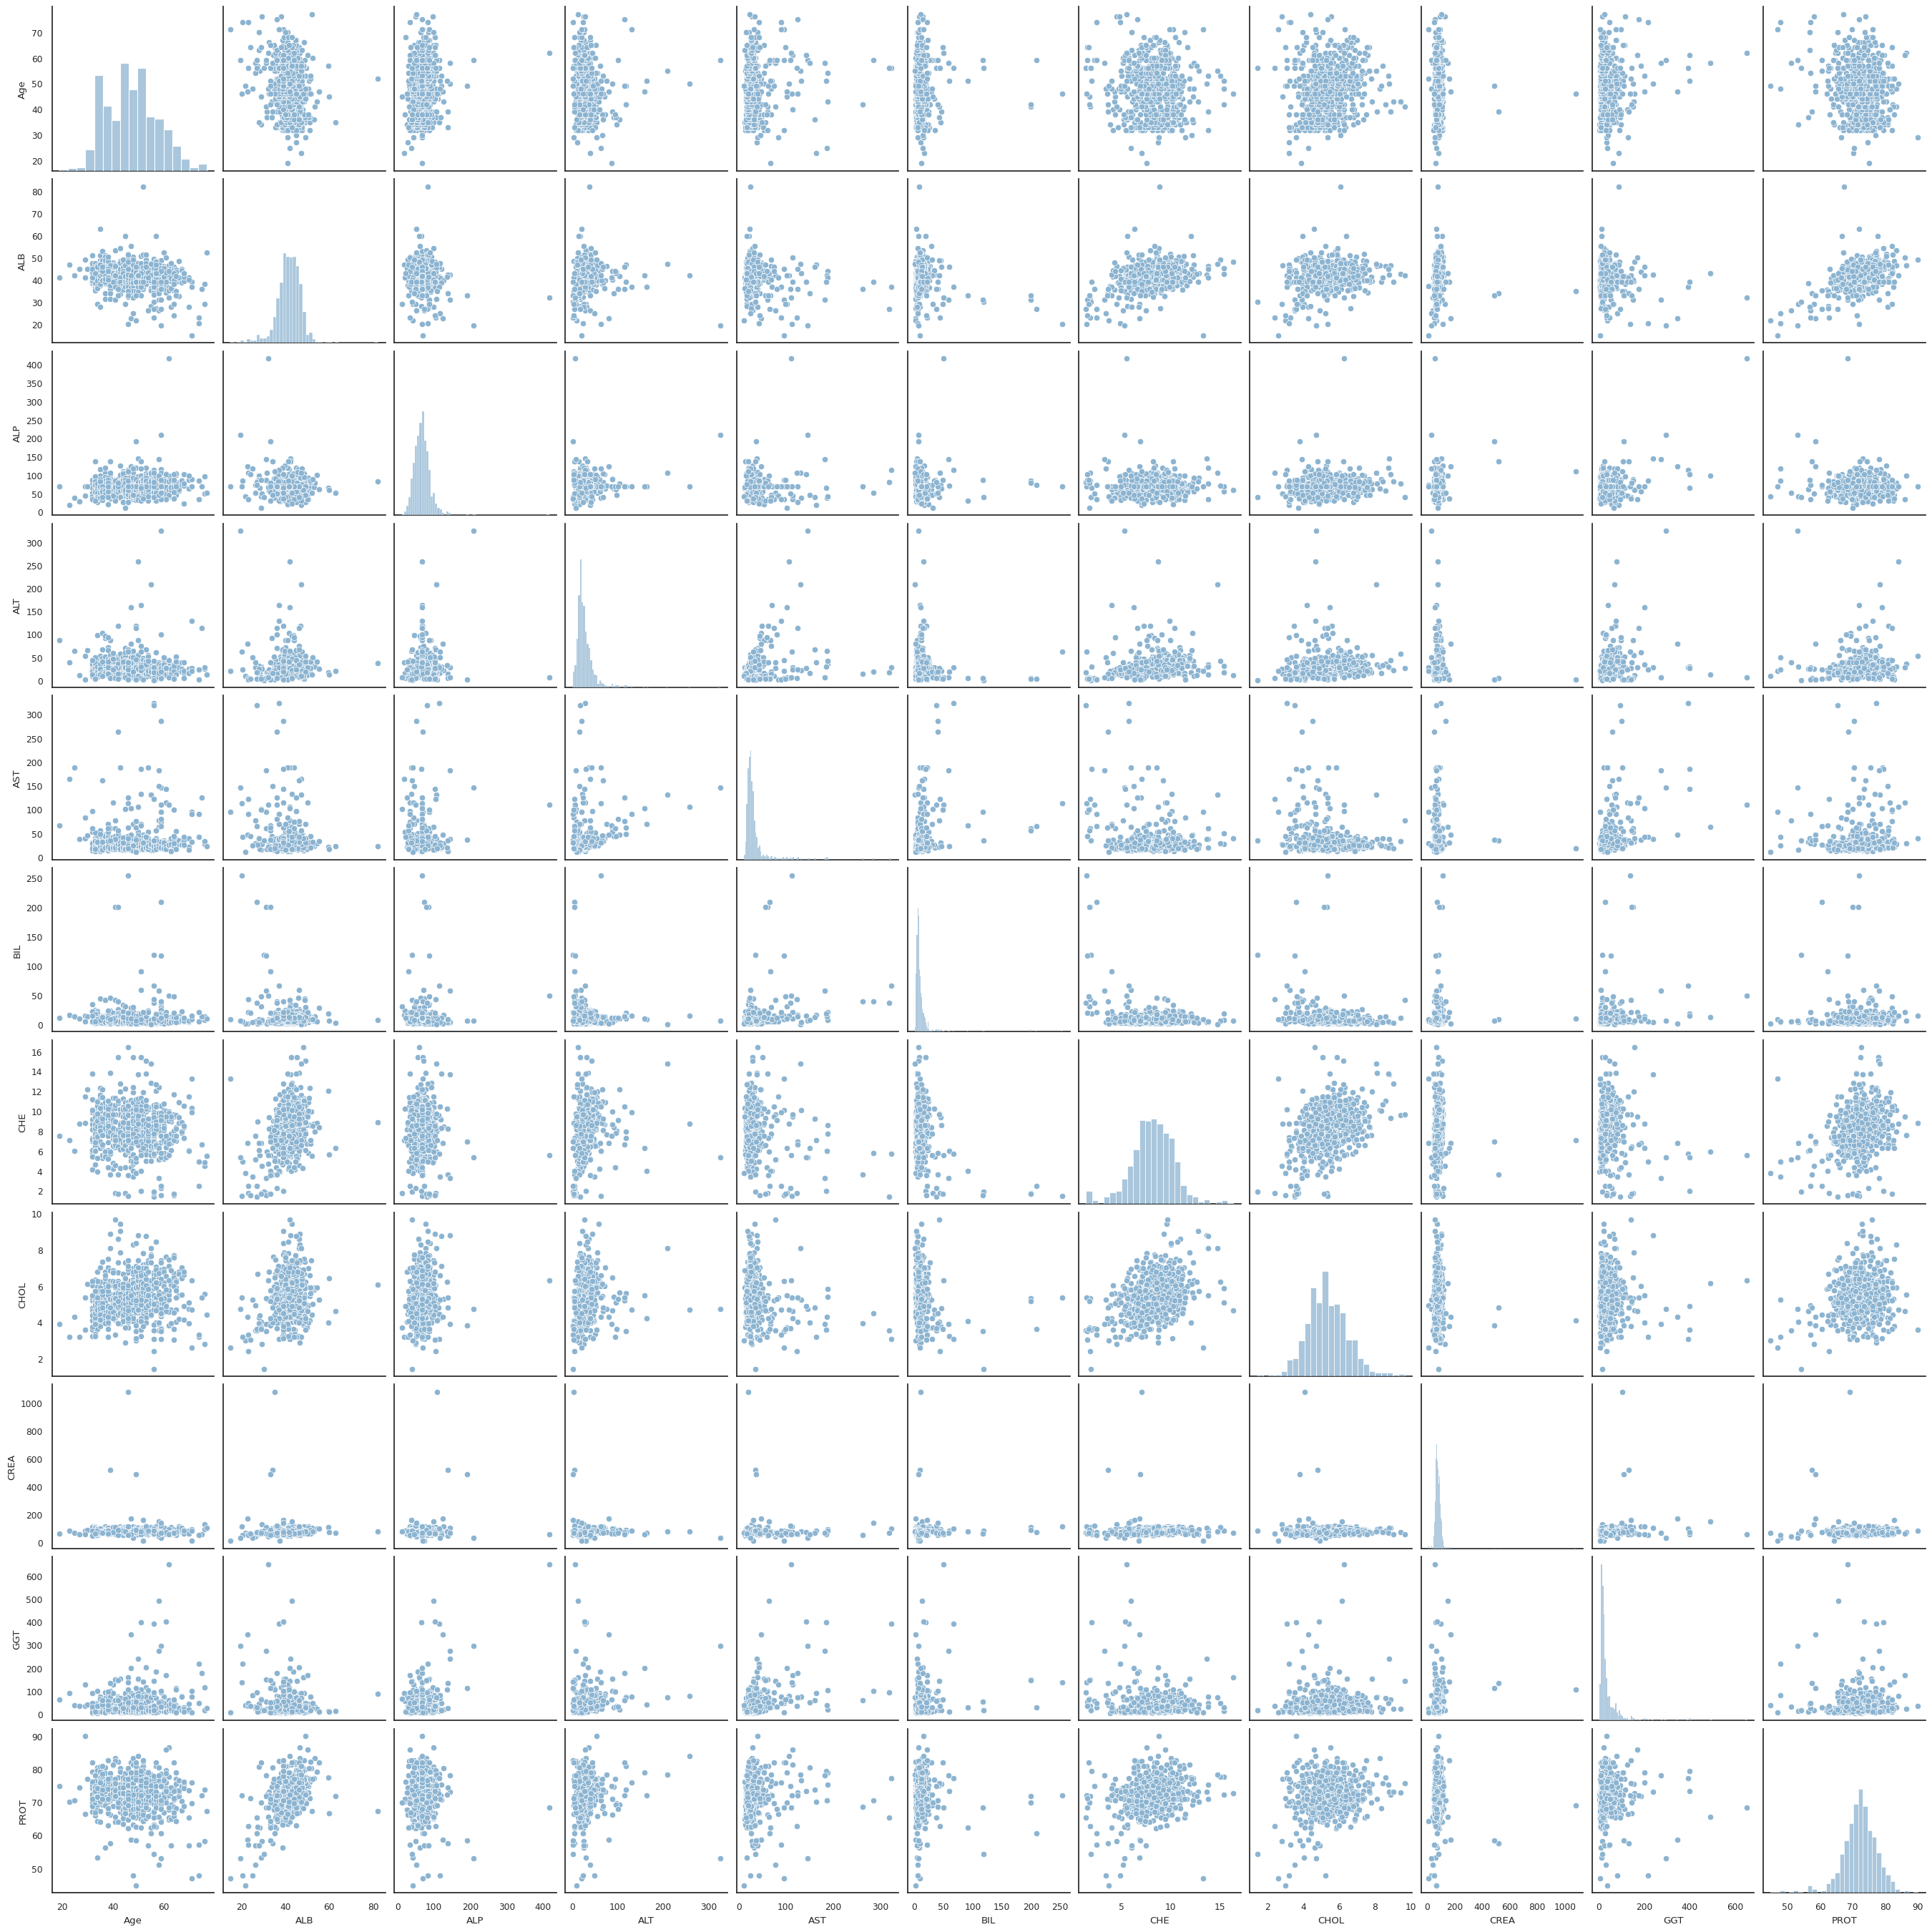

In [53]:
sns.pairplot(df)

In [54]:
from sklearn.model_selection import train_test_split
# Select predictors and target variable
predictors = [ 'CREA']
target = 'PROT'

# Extract predictor variables and target variable
X = df[predictors]
y = df[target]

# Split the data into training and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets (optional)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (492, 1)
Shape of X_test: (123, 1)
Shape of y_train: (492,)
Shape of y_test: (123,)


In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [56]:
print("Intercept:",model.intercept_,'\nCoeeficients',model.coef_)

Intercept: 72.32727972675376 
Coeeficients [-0.00348389]


In [57]:
y_test_pred = model.predict(X_test)

In [58]:
model.score(X_test,y_test)

-0.007019901329967215

In [59]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
test_r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean squared error on Testing Set:", mse)
print("R-squared on Testing Set:", test_r2)
print("Mean absolute error on Testing Set:", mae)

Mean squared error on Testing Set: 31.550638136502005
R-squared on Testing Set: -0.007019901329967215
Mean absolute error on Testing Set: 4.036562030628911


Text(0.5, 1.0, 'Best Fit Model')

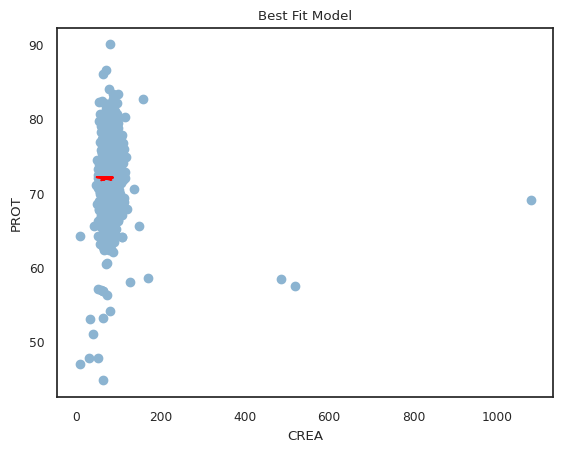

In [60]:
fig, ax = plt.subplots()
ax.scatter("CREA","PROT",data=df,label="PROT")
ax.plot(y_test,y_test_pred,color="red",label="Best Fit Model")
ax.set_xlabel("CREA")
ax.set_ylabel("PROT")
ax.set_title("Best Fit Model")

In [85]:
model1=LinearRegression()
x=df[['ALB', 'ALP', 'CREA', 'GGT','ALT','AST','BIL','CHE','CHOL']]
y=df['PROT']
model1.fit(x,y)
print("Intercept:",model1.intercept_,'\nCoeeficients',model1.coef_)

Intercept: 45.45647995115701 
Coeeficients [ 0.50208257 -0.00056272 -0.00216788 -0.00195348  0.00738146  0.02668727
  0.02336996  0.25795181  0.45891982]


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

# Calculate Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared values for training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate Adjusted R-squared values for training and testing data
n_train, p_train = x_train.shape[0], x_train.shape[1]
n_test, p_test = x_test.shape[0], x_test.shape[1]

adjusted_r2_train = 1 - (1 - train_r2) * ((n_train - 1) / (n_train - p_train - 1))
adjusted_r2_test = 1 - (1 - test_r2) * ((n_test - 1) / (n_test - p_test - 1))

# Display the evaluation metrics
print("Mean Squared Error (MSE) - Train:", train_mse)
print("Mean Squared Error (MSE) - Test:", test_mse)
print("R-squared (R2) - Train:", train_r2)
print("R-squared (R2) - Test:", test_r2)
print("Adjusted R-squared (Adj R2) - Train:", adjusted_r2_train)
print("Adjusted R-squared (Adj R2) - Test:", adjusted_r2_test)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error(MAE) - Test:", mae)

Mean Squared Error (MSE) - Train: 18.007679263663928
Mean Squared Error (MSE) - Test: 20.58774447202058
R-squared (R2) - Train: 0.3379751863130237
R-squared (R2) - Test: 0.37954885431117424
Adjusted R-squared (Adj R2) - Train: 0.3237889403054457
Adjusted R-squared (Adj R2) - Test: 0.34763993824717754
Mean Absolute Error(MAE) - Test: 3.265954833550183


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select the predictors and target variable
predictors = ['ALB', 'ALP', 'CREA', 'GGT','ALT','AST','BIL','CHE','CHOL']
target = 'PROT'

# Extract the predictor variables and target variable
X = df[predictors]
y = df[target]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Feature        VIF
0     ALB  30.939391
1     ALP   9.894721
2    CREA   3.746091
3     GGT   2.600775
4     ALT   2.671327
5     AST   3.103881
6     BIL   1.572421
7     CHE  22.129342
8    CHOL  26.864335


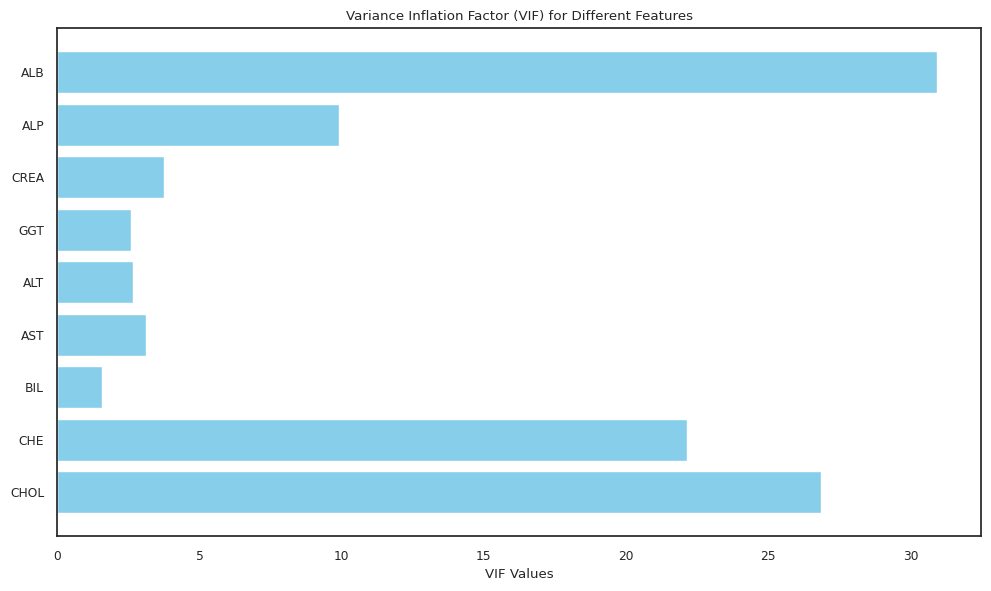

In [91]:
data = {
    'Feature': ['ALB', 'ALP', 'CREA', 'GGT', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL'],
    'VIF': [30.939391, 9.894721, 3.746091, 2.600775, 2.671327, 3.103881, 1.572421, 22.129342, 26.864335]
}

# Create a DataFrame from the data
vif_df = pd.DataFrame(data)

# Plotting a bar chart for VIF values of different features
plt.figure(figsize=(10, 6))
plt.barh(vif_df['Feature'], vif_df['VIF'], color='skyblue')
plt.xlabel('VIF Values')
plt.title('Variance Inflation Factor (VIF) for Different Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.tight_layout()
plt.show()

Inference:

Features such as ALB, CHE, and CHOL exhibit significantly high VIF values, indicating high multicollinearity.

High VIF values (above 10) suggest these features may have strong correlations with other predictors in the model, potentially causing issues like inflated standard errors and reduced model interpretability.

It might be advisable to consider addressing multicollinearity by either removing highly correlated features, using dimensionality reduction techniques, or applying regularization methods in modeling to improve model performance.

In [64]:
x=df[['ALB']]
y=df['PROT']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
p = PolynomialFeatures(degree=2)
x_train_p = p.fit_transform(x_train)
x_test_p = p.transform(x_test)
model1 = LinearRegression()
model1.fit(x_train_p,y_train)
pred = model1.predict(x_test_p)
r2=r2_score(pred,y_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print(f"Degree: 2, Split Ratio: 70-30, R2: {r2}, MSE: {mse}, MAE: {mae}")

Degree: 2, Split Ratio: 70-30, R2: -0.7300903180705569, MSE: 25.964402938237015, MAE: 3.667336977796965


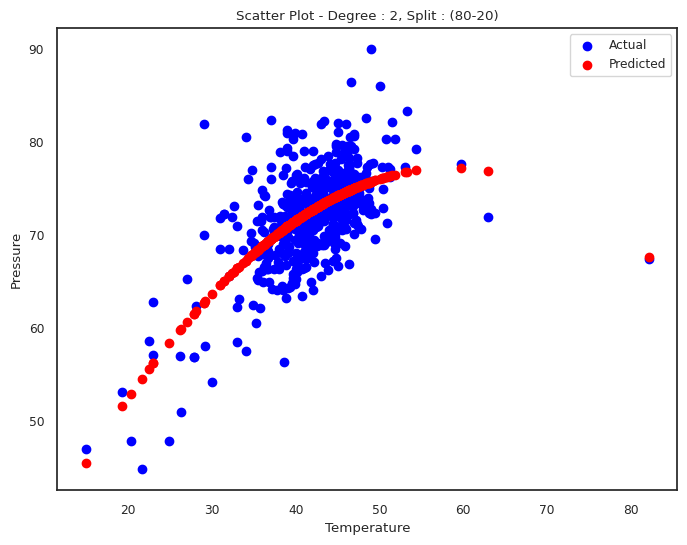

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.scatter(x_train, model1.predict(x_train_p), color='red', label='Predicted')
plt.title(f'Scatter Plot - Degree : 2, Split : (80-20)')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
p = PolynomialFeatures(degree=3)
x_train_p = p.fit_transform(x_train)
x_test_p = p.transform(x_test)
model1 = LinearRegression()
model1.fit(x_train_p,y_train)
pred = model1.predict(x_test_p)
r2=r2_score(pred,y_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print(f"Degree: 3, Split Ratio: 70-30, R2: {r2}, MSE: {mse}, MAE: {mae}")

Degree: 3, Split Ratio: 70-30, R2: -0.7315711940800165, MSE: 25.972460574380502, MAE: 3.6674764881857507


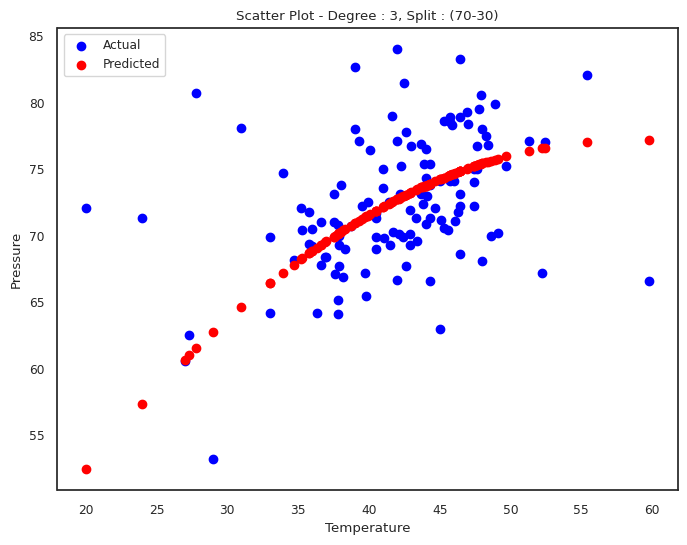

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, pred, color='red', label='Predicted')
plt.title(f'Scatter Plot - Degree : 3, Split : (70-30)')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
p = PolynomialFeatures(degree=5)
x_train_p = p.fit_transform(x_train)
x_test_p = p.transform(x_test)
model1 = LinearRegression()
model1.fit(x_train_p,y_train)
pred = model1.predict(x_test_p)
r2=r2_score(pred,y_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print(f"Degree: 5, Split Ratio: 70-30, R2: {r2}, MSE: {mse}, MAE: {mae}")

Degree: 5, Split Ratio: 70-30, R2: -0.7565330627652993, MSE: 25.919794094534126, MAE: 3.6531693418815894


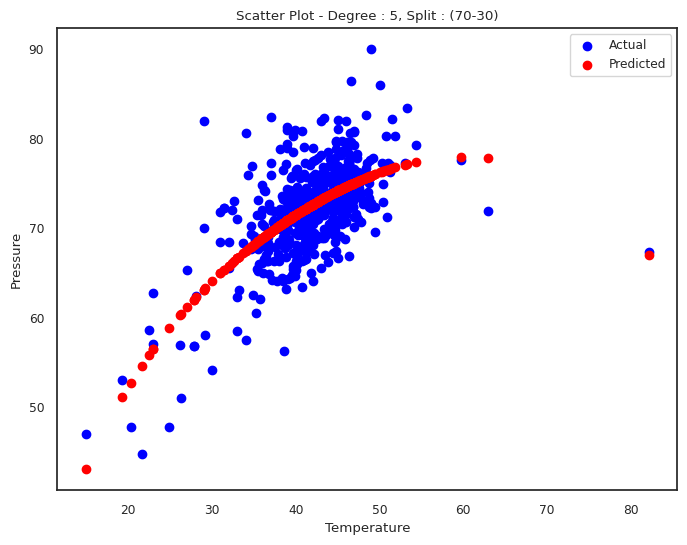

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.scatter(x_train, model1.predict(x_train_p), color='red', label='Predicted')
plt.title(f'Scatter Plot - Degree : 5, Split : (70-30)')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

Text(0, 0.5, 'y values')

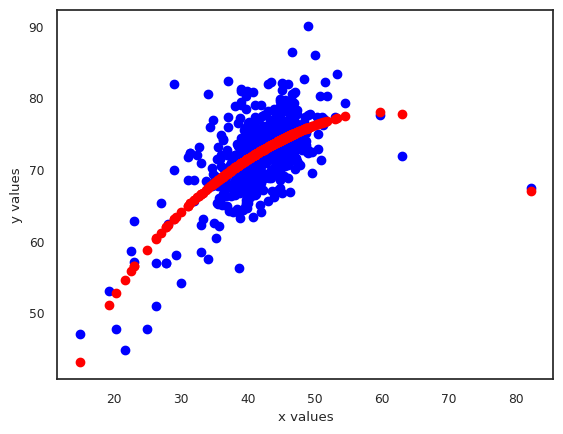

In [72]:
plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.scatter(x_train, model1.predict(x_train_p), color='red', label='Predicted')
plt.xlabel('x values')
plt.ylabel('y values')

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-20.94356479581198


In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45,
                                   50, 55, 100, 150]},
             scoring='neg_mean_squared_error')

In [75]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-20.94366598666537


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [77]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

In [78]:
r2=r2_score(prediction_lasso,y_test)
mse = mean_squared_error(y_test, prediction_lasso)
mae = mean_absolute_error(y_test, prediction_lasso)
print(f"Lasso Regression: R2: {r2}, MSE: {mse}, MAE: {mae}")

Lasso Regression: R2: -1.5717267280604839, MSE: 18.71715286872421, MAE: 3.1544612324705716


In [79]:
r2=r2_score(prediction_ridge,y_test)
mse = mean_squared_error(y_test, prediction_ridge)
mae = mean_absolute_error(y_test, prediction_ridge)
print(f"Ridge Regression: R2: {r2}, MSE: {mse}, MAE: {mae}")

Ridge Regression: R2: -1.5714346094157468, MSE: 18.717211907698417, MAE: 3.1544686534403783


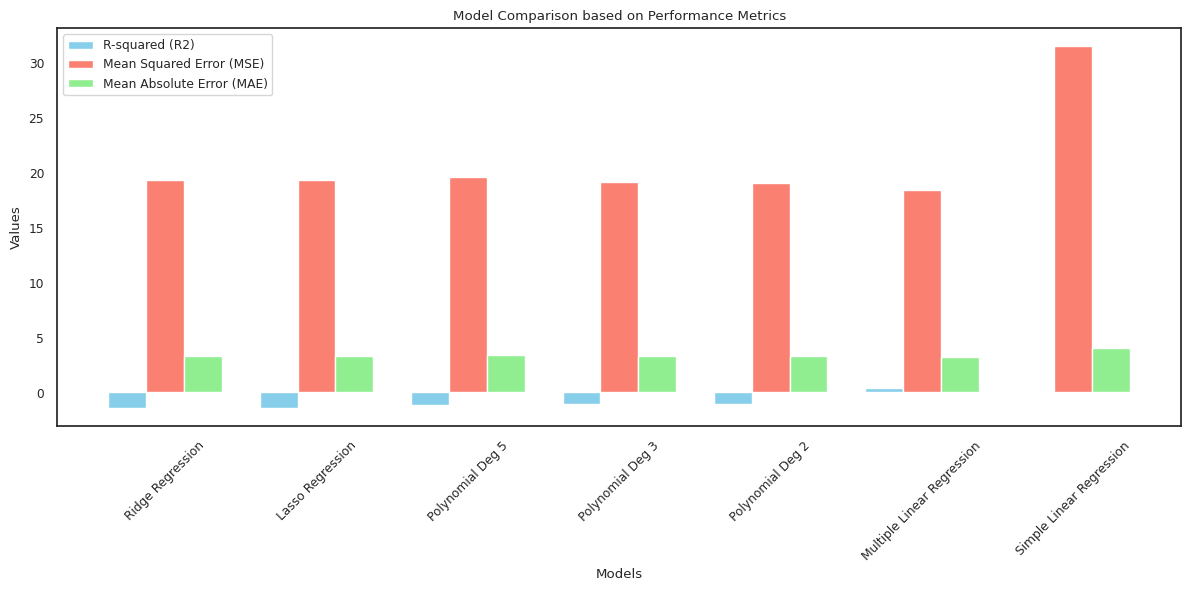

In [90]:
import matplotlib.pyplot as plt

# Given data for different models
models = ['Ridge Regression', 'Lasso Regression', 'Polynomial Deg 5', 'Polynomial Deg 3', 'Polynomial Deg 2', 'Multiple Linear Regression', 'Simple Linear Regression']
r2_values = [-1.392, -1.392, -1.162, -1.041, -1.058, 0.404, -0.007]
mse_values = [19.381, 19.381, 19.664, 19.157, 19.085, 18.423, 31.551]
mae_values = [3.271, 3.271, 3.380, 3.348, 3.353, 3.266, 4.037]

# Plotting a grouped bar chart for R2, MSE, and MAE values of different models
bar_width = 0.25
index = range(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index, r2_values, bar_width, label='R-squared (R2)', color='skyblue')
plt.bar([i + bar_width for i in index], mse_values, bar_width, label='Mean Squared Error (MSE)', color='salmon')
plt.bar([i + 2 * bar_width for i in index], mae_values, bar_width, label='Mean Absolute Error (MAE)', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Model Comparison based on Performance Metrics')
plt.xticks([i + bar_width for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

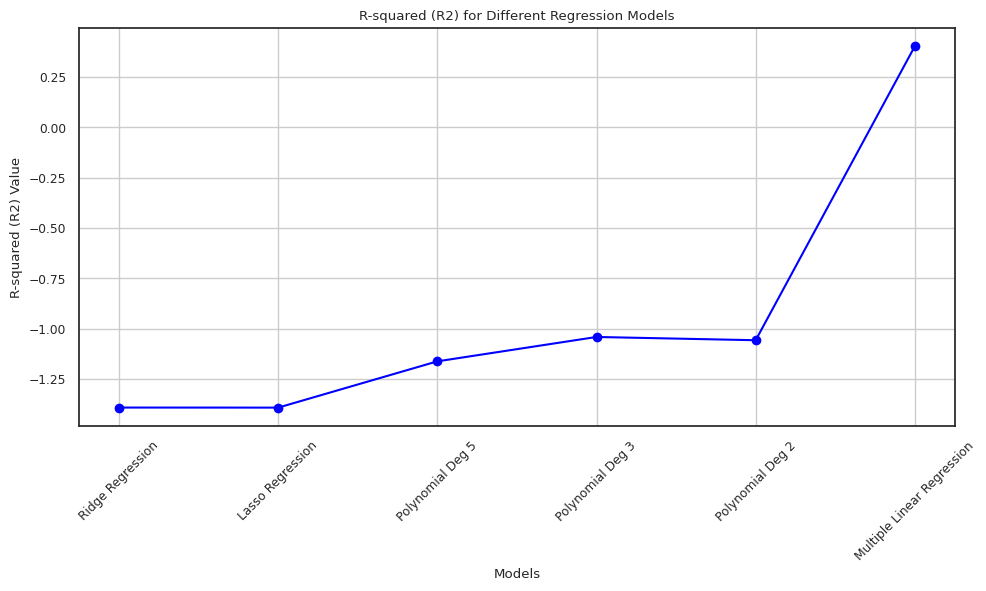

In [83]:
models = ['Ridge Regression', 'Lasso Regression', 'Polynomial Deg 5', 'Polynomial Deg 3', 'Polynomial Deg 2', 'Multiple Linear Regression']
r2_values = [-1.392185229856055, -1.3924618458078086, -1.1624343810825715, -1.0413265281116484, -1.0575129932307212, 0.40395210164940365]

# Ensure consistency in lengths
models = models[:len(r2_values)]

# Plotting R-squared (R2) using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, r2_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Value')
plt.title('R-squared (R2) for Different Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

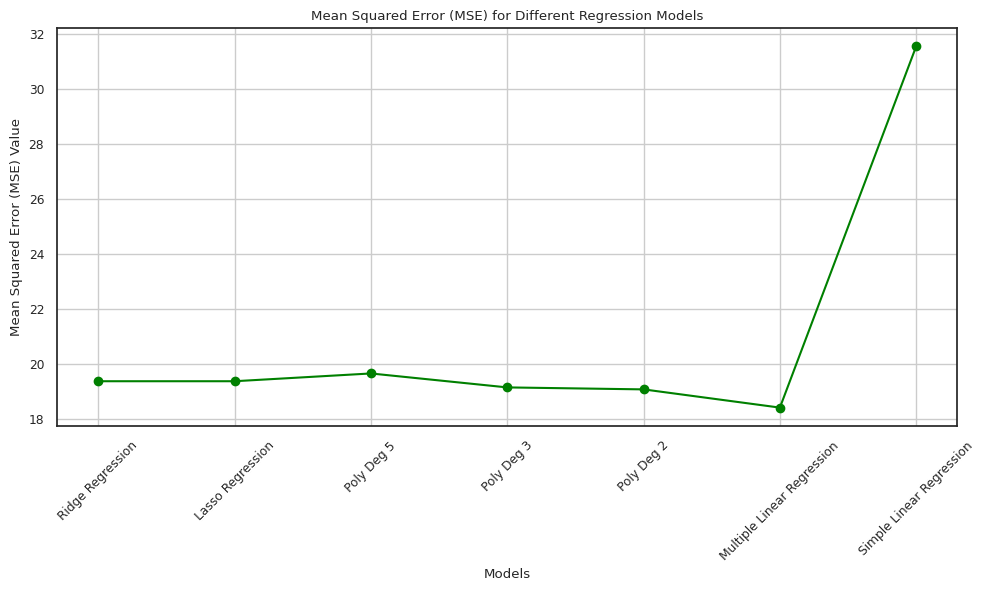

In [89]:
models = ['Ridge Regression', 'Lasso Regression', 'Poly Deg 5', 'Poly Deg 3', 'Poly Deg 2', 'Multiple Linear Regression', 'Simple Linear Regression']
mse_values = [19.38135681998883, 19.381335059361646, 19.663687972951355, 19.156826109866017, 19.085141051335878, 18.422991528957922, 31.550638136502005]

# Plotting Mean Squared Error (MSE) using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, mse_values, marker='o', linestyle='-', color='green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE) Value')
plt.title('Mean Squared Error (MSE) for Different Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

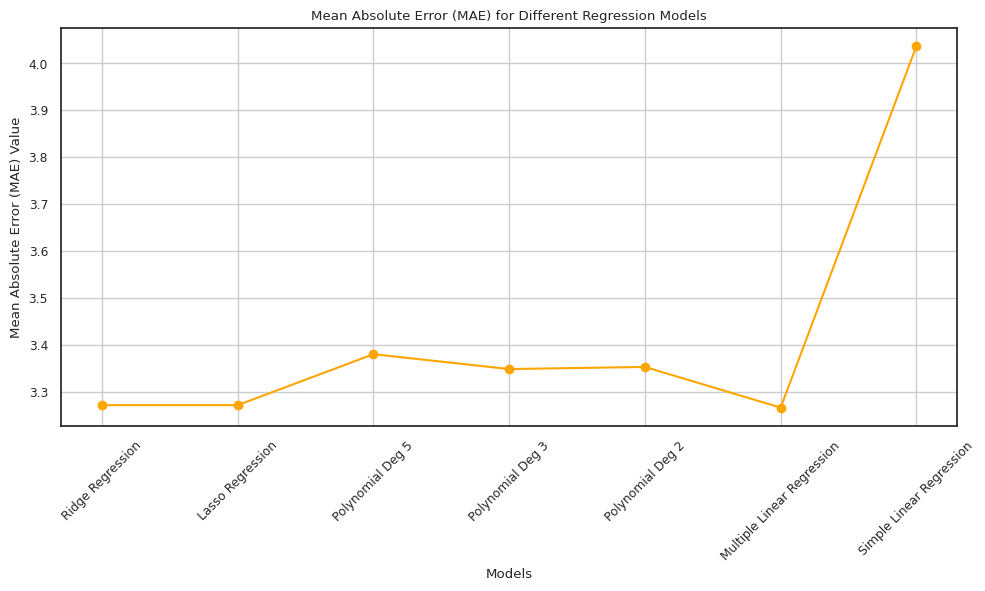

In [88]:
models = ['Ridge Regression', 'Lasso Regression', 'Polynomial Deg 5', 'Polynomial Deg 3', 'Polynomial Deg 2', 'Multiple Linear Regression', 'Simple Linear Regression']
mae_values = [3.271192324351796, 3.2711915684975463, 3.3798495353435776, 3.348178620656313, 3.3526788447301215, 3.265954833550183, 4.036562030628911]

# Plotting Mean Absolute Error (MAE) using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, mae_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE) Value')
plt.title('Mean Absolute Error (MAE) for Different Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Ridge Regression:

R2: -1.392, MSE: 19.381, MAE: 3.271

Inference: The model performs poorly, indicating a weak relationship between predictors and the target. The high MSE and MAE suggest significant errors in predictions.

Lasso Regression:

R2: -1.392, MSE: 19.381, MAE: 3.271

Inference: Similar to Ridge Regression, Lasso also exhibits poor performance with high errors and a low R2 value.

Polynomial Regression:

Degree 5: R2: -1.162, MSE: 19.664, MAE: 3.380

Degree 3: R2: -1.041, MSE: 19.157, MAE: 3.348

Degree 2: R2: -1.058, MSE: 19.085, MAE: 3.353

Inference:
 Polynomial regressions (Degree 2, 3, 5) show slightly better R2 values but still indicate poor fit and high errors. The higher-degree polynomial does not significantly improve the model.

Multiple Linear Regression:

MSE (Test): 18.423, R2 (Test): 0.404, MAE (Test): 3.266
Adj R2 (Test): 0.348

Inference:
 This model demonstrates a better fit compared to the others, indicated by the positive R2 (Test) value and a lower MSE. The Adjusted R2 suggests around 34.8% of the variance explained by the predictors.

Simple Linear Regression:

MSE: 31.551, R2: -0.007, MAE: 4.037

Inference:
This model performs poorly with negative R2, indicating the model doesn't fit the data well. Additionally, it has the highest MSE and MAE among all models.

In summary, the multiple linear regression model performs relatively better compared to the other models, exhibiting a positive R2 value, lower MSE, and MAE. However, despite its relatively better performance, there might still be room for improvement as indicated by its Adjusted R2 value. Polynomial and simple linear regressions perform poorly compared to the multiple linear regression, showing weaker relationships and higher errors.